# Curve/data fitting and interpolation

**Note about how this notebook works:** At the request/suggestion of a student in the class, I will be writing more code *in class*. That means that the notebook I am working with will have parts missing and I'll fill those in in class. This will give you more opportunity to try to write code before seeing the answer. It will also be beneficial to watch me write code, so I like it! 

Therefore, **this notebook is currently incomplete.** If you'd like to look at the complete version, see `Jan31-DataFitting-KEY.ipynb`

**Note:** The code in this notebook uses data from the file `data1.csv`.  You should download that file and save it in the same directory as this notebook.  

The following scenario is incredibly common in scientific and engineering applications: We can measure two (or more, but we will stick to two for now) variables $x$ and $y$ and we have collected many data points.  For instance, $x$ could represent time and $y$ could represent the position of an object, or $x$ could be latitude and $y$ could be temperature, or any other combination of variables you could imagine.  

When recording your data, you typicaly organize it in a table or spreadsheet like the following: 

| x | y      |
|---|--------|
| 0 | 1.1651 |
| 1 | 3.1333 |
| 2 | 5.2382 |

This is fine just for reading data, but it is not particularly convenient for doing mathematics.  To make this more straightforward, we will usually think of our data as two vectors on paper, or two 1D arrays in python: 

$\mathbf{x} = \begin{matrix} 0 & 1 & 2 \end{matrix}$, 

$\mathbf{y} = \begin{matrix} 1.1651 & 3.1333 & 5.2382 \end{matrix}$.  

**You define these in the next two cells.**

In [44]:
# Create the two arrays above
import numpy as np
x = np.array([0, 1, 2])
y = np.array([1.1651, 3.1333, 5.2382])

print(x)
print(y)

[0 1 2]
[1.1651 3.1333 5.2382]


Keep in mind that the order of these two vectors is important.  The first entry of $\mathbf{x}$ matches the first entry of $\mathbf{y}$, etc.  For the rest of this week, we will refer to the number of data points (which is also the length of the vectors $\mathbf{x}$ and $\mathbf{y}$) as $n$.  

Another fairly convenient way to represent our data is by graphing it.  For example, the file `data1.csv` has a slightly lengthier data set. 

**You will load and plot it in the cell below.**

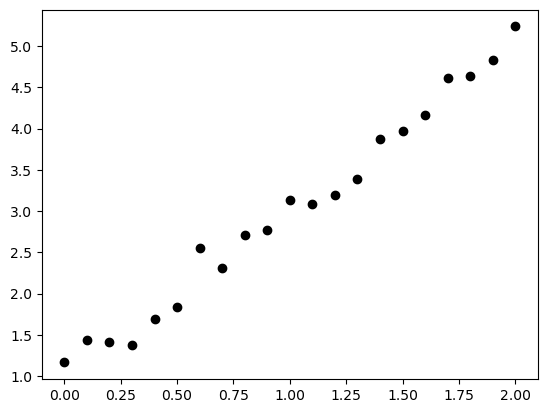

In [45]:
# Load in the data, "data1.csv" using np.genfromtxt
data = np.genfromtxt("data1.csv", delimiter = ",") # You might have '' instead of ""

# Define x and y from the data
x = data[0, :]
y = data[1, :]

# Create a figure and plot it using black dots
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x, y, 'ko')

These data points clearly don't lie exactly on a line, but it does seem like a straight line might come pretty close to all of the points.  Just from eyeballing the data, we can come up with a pretty reasonable guess.  For instance, here is the line $$y = 2.1x + 0.9.$$  

**You will plot the data and the guess of the trendline below.**

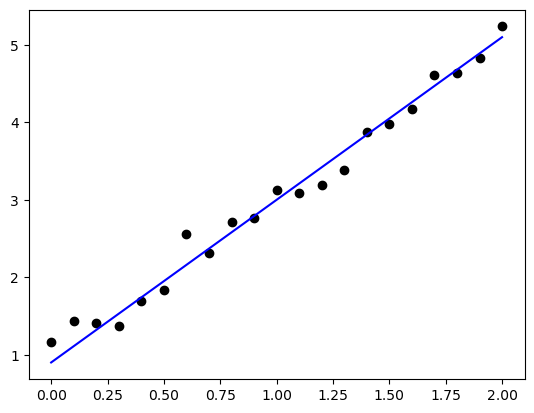

In [46]:
# Define an array called "xplot" that consists of 1000 points between 0 and 2. 
# This is used for plotting.
xplot = np.linspace(0, 2, 1000)

# Now that "xplot" is defined, define "yplot" which implements the 
#         formula y = 2.1x+0.9 for all of the xplot points.
yplot = 2.1*xplot+0.9 # You could also do this with an anonymous function and plug in xplot.
# y = lambda x: 2.1*xplot + 0.9
# yplot = y(xplot)

# Now plot the data using black circles and the "model" (the line y = 2.1x+0.9) 
#       using a blue line. 
plt.plot(x, y, 'ko')
plt.plot(xplot, yplot, 'b-')

0.39256858360030966


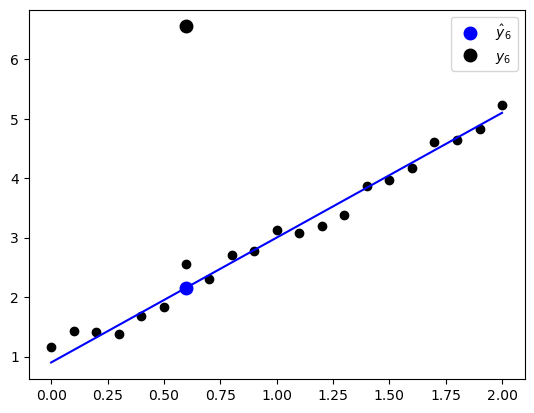

In [47]:
# Define an array called "xplot" that consists of 1000 points between 0 and 2. 
# This is used for plotting.
xplot = np.linspace(0, 2, 1000)

# Now that "xplot" is defined, define "yplot" which implements the 
#         formula y = 2.1x+0.9 for all of the xplot points.
#yplot = 2.1*xplot+0.9 # You could also do this with an anonymous function and plug in xplot.
y_model = lambda x: 2.1*x + 0.9
yplot = y_model(xplot)

# Now plot the data using black circles and the "model" (the line y = 2.1x+0.9) 
#       using a blue line. 
plt.plot(x, y, 'ko')
plt.plot(xplot, yplot, 'b-')
plt.plot(x[6], y_model(x[6]), 'bo', markersize=9, label='$\hat y_6$')
plt.plot(x[6], y[6]+4, 'ko', markersize=9, label='$y_6$')
plt.legend()

print(np.abs(y[6] - y_model(x[6])))

This line seems to describe our data fairly well, but we would like some way to quantify how good a description this actually is.  In particular, we want to find a measure of the error between our line and the dataset.  A good numerical description of error should follow a few basic rules: 

1) The error should be zero if and only if the line goes through every data point.  Zero error will mean a "perfect fit".  

2) If the line is not a perfect fit (i.e., if at least one point isn't on the line) then the error should be positive, regardless of whether the line is too high or too low.  This means that we don't care about the direction of our error.  

3) If we change the data set so that one point moves farther away from the line without changing any other points, then the error should not get lower.  That is, if we get a strictly worse fit, then we should not get a smaller error.  

It turns out that these criteria are not enough to specify an error formula, so there is quite a bit of choice involved.  We will describe a few examples of common error functions and then choose one that is most convenient for our purposes.  

Before we describe these aggregate measures of error, though, let's introduce some useful notation.  Suppose that $(x_k, y_k)$ is one of the points in our data set.  We will think of $y_k$ as being the "actual $y$ value" corresponding to $x_k$ and we will think of the line as giving a prediction for this $y$ value.  That is, the predicted $y$ value for $y_k$ is given by $\hat{y}_k = 2.1x_k + 0.9$.  (The symbol $\hat{y}$ is read as "y hat".  In general, variables with hats are predicted values.)  If we have an arbitrary line $y = mx + b$, then the predicted value for $y_k$ is given by $\hat{y}_k = mx_k + b$.  The error of our prediction at a given data point is just the difference between our prediction and the actual value, or $\hat{y}_k - y_k$.  Notice that this formula only makes sense if we have a data point $(x_k, y_k)$.  You can't even define the error for any other $x$ or $y$ values because we don't have an actual $y$ to compare to.  

If we calculate our prediction error at every point, we get a list of $n$ different errors.  One of the simplest ways to quantify the total error of our line is to just take the worst possible prediction error.  That is, we define the total error as 

$E = \displaystyle\max_{k=1,\dotsc,n}|\hat{y}_k - y_k|$.  

(Notice the absolute value signs to ensure that our error is never negative.)  In the context of data fitting, this is usually called the *maximum error*, for obvious reasons.  We have actually already seen this quantity in the context of vectors.  It is the infinity norm of the vector of prediction errors: $||\mathbf{\hat{y}} - \mathbf{y}||_{\infty}$.  

Unfortunately, the maximum error has a pretty serious flaw.  It is only governed by the worst possible error, which means that if we have one data point that is very far from our line then the error will be extremely high, even if there are hundreds of other data points that are very close.  A single point very far away from the other data is called an *outlier*, so we say that the maximum error is very sensitive to outliers.  There may be times when we want this though, we will talk about that more in the activity.

To correct this issue, we need to include the error from all of our points, not just the worst outlier.  One possibility is to simply average all the different errors: 

$E = \frac{1}{n}\displaystyle\sum_{k=1}^{n}|\hat{y}_k - y_k|$.  

This is called the *average error* or $L^1$ *error*.  A single outlier is not as important in this formula because its corresponding error is divided by $n$.  This means that one "bad" point and hundreds of "good" points will still produce a relatively small error value.  

Another possibility is to average the squares of all the errors instead of their absolute values.  For a combination of historical and technical reasons, we usually take the square root of this average as well.  That is, we define

$E = \sqrt{\frac{1}{n}\displaystyle\sum_{k=1}^{n}(\hat{y}_k - y_k)^2}$.

This is called the *root-mean-square error* or the $L^2$ *error*.  We will often abbreviate it to RMS error.  As before, this is not nearly as sensitive to outliers as the maximum error because each error term is weighted by $1/n$.  Both the average error and the RMS error are quite useful and lead to interesting data analysis methods.  However, it turns out that the RMS error is usually much easier to work with.  We will explore the different error formulas later in class, but for now let's work with RMS error.

## Calculating RMS error
In general, the data values $\mathbf{x}$ and $\mathbf{y}$ are fixed - you collect those data values beforehand and then are not allowed to modify them afterwards.  The only thing we are allowed to change is the formula for our line, which is equivalent to changing the parameters $m$ and $b$.  We can therefore think of the error as a function of these two parameters: 

$E(m, b) = \sqrt{\frac{1}{n}\displaystyle\sum_{k=1}^{n}(\hat y_k - y_k)^2} = \sqrt{\frac{1}{n}\displaystyle\sum_{k=1}^{n}(mx_k + b - y_k)^2}$.  

Once again, note that this formula only makes sense with the original data points.  When we refer to the RMS error of a fit, we always mean this formula with all $n$ original data points (and no others) plugged in.  If we ever need to talk about the RMS error for two different data sets, I will specify in context.  

Using this formula, we can find the RMS error of the line $y = 2.1x + 0.9$.

**You: define E(m,b) as an anonymous function and plug in the values we guessed (m = 2.1, b = 0.9). Print that error.**

In [48]:
# Define the anonymous function for E(m,b). To do so we'll also need to define n:
n = len(x)
E = lambda m, b: np.sqrt( 1/n*np.sum( (m*x + b - y)**2 ) )

# Plug in m = 2.1, b = 0.9
print(E(2.1, 0.9))
# Print the error

0.1692301154815189


(There are a few important points to mention about this code.  The sum function adds up all the entries of a vector.  We relied on the fact that `m * x + b - y` uses elementwise multiplication, addition and subtraction, so it produces a vector of all the prediction errors.  The `**` then performs elementwise squaring, so we square each prediction error separately.  You should also pay attention to the order of parentheses.  It is very easy to accidentally square the entire sum instead of squaring each term, which will give a very different error value.)

We found an RMS error of $0.1692$.  Is that a good number?  If you take a statistics class, you will probably spend a lot of time talking about how to interpret this value, but without some extra assumptions and a lot more mathematical machinery, we can't really do anything with a single RMS error.  What we can do is compare two different error values for the same data set.  That is, we can try another $m$ and $b$ and see if we get a larger or smaller error.  If you experiment with different slopes and $y$ intercepts, you can easily come up with lines that have a worse fit (i.e., produce a larger RMS error).  You can also probably find some lines that have a better fit (i.e., produce a smaller RMS error).  

## Finding the best fit line
If we really want to understand our data set, we need to find the *best* fit.  That is, we need to find the values of $m$ and $b$ that produce the smallest possible RMS error.  In other words, we need to minimize $E(m, b)$.  We just spent a week learning how to minimize functions in python, so we have some useful tools for this problem.  In particular, since $E$ is a function of two variables, we could use `scipy.optimize.fmin` to minimize it (or we could use the gradient descent algorithm from last week).  Before we jump to `fmin`, though, we will use a common mathematical trick.  Since $\sqrt{x}$ is an increasing function, the functions $\sqrt{f(x)}$ and $f(x)$ have exactly the same minimum.  This means that in order to find the minimum of $E$ we only need to find the minimum of 

$\mathcal{E}(m, b) = \displaystyle\sum_{k=1}^{n}(mx_k + b - y_k)^2$.  

This is minimized by exactly the same $m$ and $b$ as $E(m, b)$, but it will be easier to minimize this function.

**You: import scipy.optimize, define a new function representing the new error function defined above, and minimize that using `fmin`. Remember that you need an adapter function!**

In [49]:
# Import scipy.optimize
import scipy.optimize

# Define the new error function
Err = lambda m, b: np.sum( (m*x + b - y)**2 )
Err_adap = lambda p: Err(p[0], p[1]) # p[0] = m, p[1] = b

# Minimize using scipy.optimize.fmin
best_vals = scipy.optimize.fmin(Err_adap, np.array([2.1, 0.9]))

# Print the result!
print(best_vals)

Optimization terminated successfully.
         Current function value: 0.538416
         Iterations: 28
         Function evaluations: 56
[2.01508619 1.00373035]


This tells us that the best fit line has the parameters $m = 2.0151$ and $b = 1.0038$.  That is, $y = 2.0151x + 1.0038$ will have a lower RMS error than any other line (for this particular data set).  We call this line the *best fit line* for our data set.  "Best" in this context means the lowest RMS error.  It is important to remember that our definition of "best" depends on the choice of error.  If we had used the maximum error instead, we would have found a different best fit line.  

We can confirm this by checking the RMS error. **You: define m and b from the result above. Plug into the original error formula and print it.**

In [50]:
# Define m and b
m = best_vals[0]
b = best_vals[1]

# Plug into RMS error function defined above.
print(E(m, b))

0.1601214299435932


Notice that this is lower than the value we got for $m = 2.1$ and $b = 0.9$.  No matter what values of $m$ and $b$ you try, you won't be able to get a smaller RMS error than this one.  

## Polyfit and polyval
The procedure we just outlined for finding a best fit line is so common that python has a predefined command for it.  Instead of finding the derivatives of $\mathcal{E}$ and setting them to zero, then creating the corresponding linear system and solving it with `solve`, you can just use the numpy function `polyfit`.  This command takes three inputs: An array of $x$ data, an array of $y$ data and a degree.  The $x$ and $y$ arrays are just our original data set.  We will talk more about the degree in the next lecture, but to find a best fit line we should just use 1 for the order.  We can therefore try 

In [51]:
coeffs = np.polyfit(x, y, 3) #np.polyfit(xdata, ydata, degree_of_polynomial_fit)
print(coeffs)
print(E(coeffs[0], coeffs[1]))

[0.0410232  0.07261313 1.71977095 1.11367152]
3.1455712838373278


If we want to graph this best fit line, we can take advantage of another useful numpy function called `polyval`.  This function takes the coefficients of a polynomial (remember, a line is a 1st degree polynomial) and a 1D array of $x$ values and then returns a corresponding array of $y$ values.  We could therefore plot this line with the following code: 

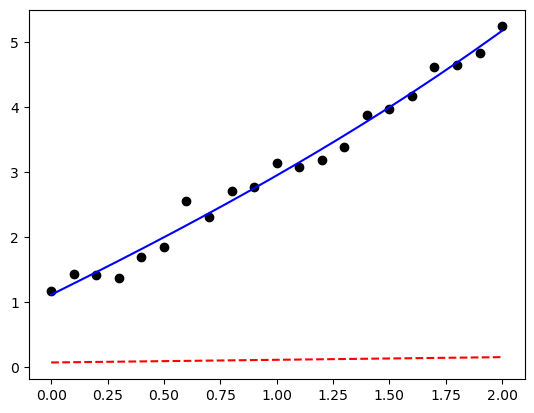

In [52]:
xplot = np.linspace(0, 2, 1000)
yplot = np.polyval(coeffs, xplot) # This is always the one you want to do: it is more efficient
plt.plot(x, y, 'ko')
plt.plot(xplot, yplot, '-b')
plt.plot(xplot, coeffs[0]*xplot + coeffs[1], '--r')

The `polyval` function saves a little bit of typing here and also means that you don't have to remember which order the coefficients from `polyfit` come in.  The `polyval` function also significantly reduces rounding error when plugging values into higher order polynomials, so it is *always* better to use `polyval` than to type out the equation `coeffs[0] * xplot + coeffs[1]` directly.  **You can and should check this below using the plot command!**

## Nonlinear data fitting
You have probably seen "least-squares" lines or other lines of best fits, but we don't need to fit with a line. Not all data falls on a straight line, so why should the models only predict that? For examples, consider the following dataset, called `quad_data.csv`.

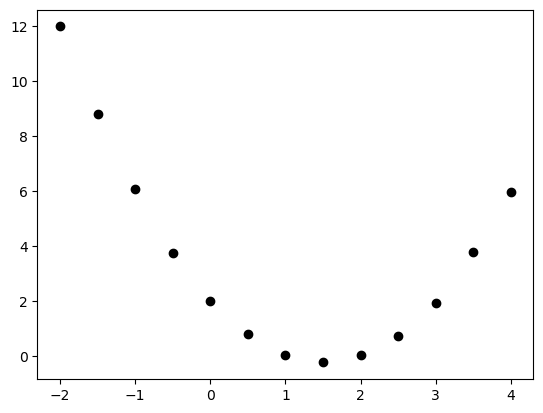

In [53]:
# Load in the new dataset called 'quad_data.csv' and define x and y as before. 
data2 = np.genfromtxt('quad_data.csv', delimiter = ',')
x = data2[0, :]
y = data2[1, :]

# Create a new figure and axes
fig2, ax2 = plt.subplots() # We do this to create a new plot that we can refer to regularly.
# Plot the data on ax2
ax2.plot(x, y, 'ko')

This pretty obviously does not look like a line: a linear fit won't do too great here, but let's try anyway using `np.polyfit`. 

In [54]:
# Create a linear fit using polyfit
lin_fit = np.polyfit(x, y, 1)

# Print the result
print(lin_fit)

[-1.00977132  4.50793051]


We can see that the slope of the line of best fit is -1.0098 and the y-intercept is 4.5079. We want to graph it on the same axes as the data so we can see how it compares. We need a new $x$ vector for a smooth plot (it doesn't matter for a line but will be important for curves).

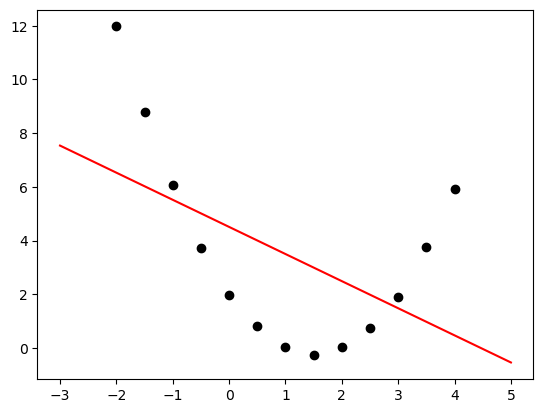

In [55]:
# Create an array for plotting. Use points between -3 and 5. Call it "x_plot"
x_plot = np.arange(-3, 5+0.1, 0.1)

# Evaluate the "lin_fit" polynomial at the x_plot points
y_plot = np.polyval(lin_fit, x_plot)

# Plot it on ax2
ax2.plot(x_plot, y_plot, 'r')
fig2 # Show fig2

This doesn't look like a good fit, but we expected that because the data looks parabolic. Let's try to fit a quadratic function. We will use `polyfit` again but with degree 2.

In [56]:
# Do a *quadratic fit*, using polyfit but degree 2 instead of 1
quad_fit = np.polyfit(x, y, 2)

# Print the results to see what we have.
print(quad_fit)

[ 0.99474569 -2.99926269  2.02106629]


This means that we have a new model:
$$\hat y_k = 0.99474569 x_k^2 - 2.9992629 x_k + 2.02106629.$$
We can plot this on the same figure as before to see what it looks like.

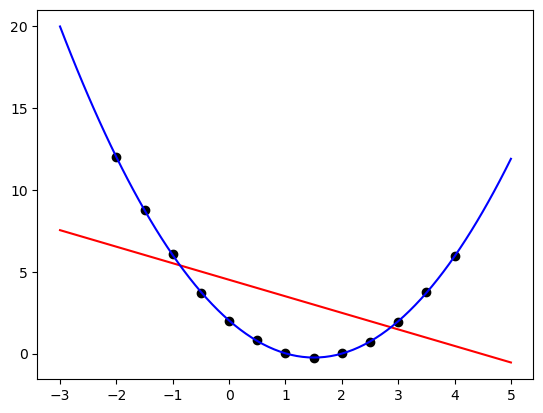

In [57]:
# Evaluate the quad fit found above at the x_plot points
y_plot = np.polyval(quad_fit, x_plot)

# Plot on ax2 using a blue line
ax2.plot(x_plot, y_plot, 'b')

# Show fig2
fig2

This is extremely good looking! In fact it looks like there is no error, but let's check that. We will use the same $L^2$ definition of error that we discussed before. We can do so by using polyval on the data.

In [58]:
# Define the RMS error. We will ignore the 1/n and square root.
err_quad = np.sum( ( np.polyval(quad_fit, x) - y )**2   )

# Print the error
print(err_quad)

0.01880056554091383


We can see that there is positive error. If we zoomed in on the plot above we could see that it does not match up exactly. Though we are happy with this fit, what if we went to higher degree? Let's see what happens when we fit with a cubic function.

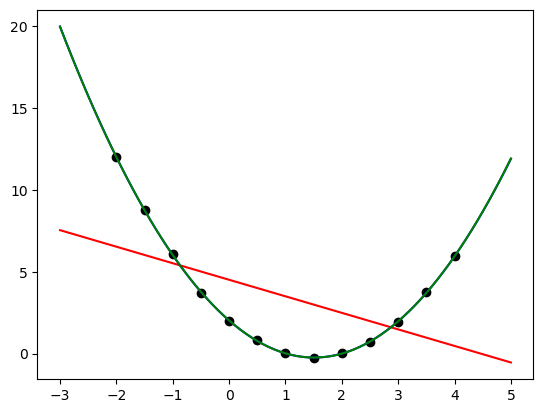

In [59]:
# Calculate a cubic fit, same as above but with n = 3. 
cube_fit = np.polyfit(x, y, 3)

# Plot by evaluating the cube_fit at the x_plot points.
y_plot = np.polyval(cube_fit, x_plot)

# Plot it on ax2
ax2.plot(x_plot, y_plot, 'g')

# Show fig2
fig2

Notice that the this curve falls almost exactly on the quadratic fit. In fact, if you we look at the cubic polynomial we see that the coefficients are similar, with the $x^3$ term being very small.

In [60]:
# print cube_fit to see the result
print(cube_fit)

[ 4.95155713e-04  9.93260222e-01 -3.00087195e+00  2.02366586e+00]


So is this better? Let's take a look at the error:

In [61]:
# Define the RMS error for the cube fit
err_cube = np.sum( ( np.polyval(cube_fit, x) - y )**2   )

# Print the error to see it
print(err_cube)

# Check: is this error less than the quadratic error?
print(err_cube < err_quad)

0.01872167913986215
True


We can see that the error has actually decreased! It turns out we can keep getting lower error by using higher-degree polynomial fits.

In [62]:
# Get the degree-8 fit
oct_fit = np.polyfit(x, y, 8)

# Find the RMS error for the degree-8 fit
err_oct = np.sum( ( np.polyval(oct_fit, x) - y )**2   )

# Print the error
print(err_oct)

# Check if the error is less than the cube error.
print(err_oct < err_cube)

0.008238995025648965
True


So it appears that the error has decreased significantly! Let's plot it to verify visually. 

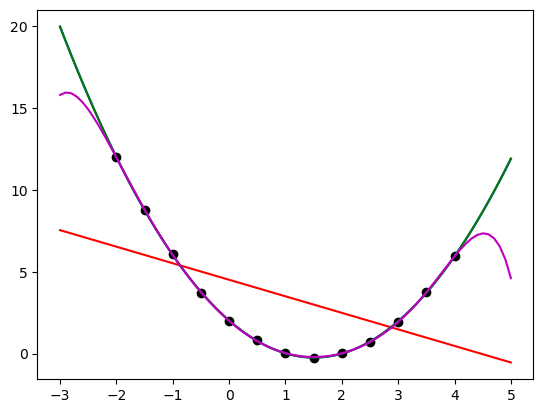

In [63]:
# Evaluate the degree-8 fit at the x_plot points
y_plot = np.polyval(oct_fit, x_plot)

# Plot it on ax2
ax2.plot(x_plot, y_plot, 'm')

# Show fig2
fig2

Notice that as we increase the degree, it fits the data points very well, but it doesn't match the "trend" for values outside of the data points (*extrapolation*). Empirically, we can see that a quadratic function captures the trend very well. In fact, the way that I created this data set was by taking points on the parabola $y = x^2-3x+2$ and then adding noise by changing them each by a small (random) amount. So in some sense the quadratic fit is truly the "right" answer. By using higher degree polynomials (more parameters), we can lower the error, but we lose some of the predictive power. For example, if you wanted to guess what the data point would be at $x = 5$, which curve would give the best result? The parabola would because the data is just a quadratic relationship between $x$ and $y$, but with some random noise. This is quite common with real world data - there is an underlying relationship with random noise. Using an overly complicated model (i.e. too many parameters) can give you small error on your limited amount of data but doesn't represent the true trend. This is called **overfitting** and something you always need to be worried about: we don't want to lower the error so much at the rist of creating an obviously bad model that loses predictive power.

As we have seen, fitting polynomials in python is easy. However, We are also going to be interested in fitting curves that are NOT polynomials. In order to do that, we need to dig a little bit deeper into the mechanics of curve fitting. In particular, we are going to have to talk about error. Let's load some new data and plot it.

### A harder fit

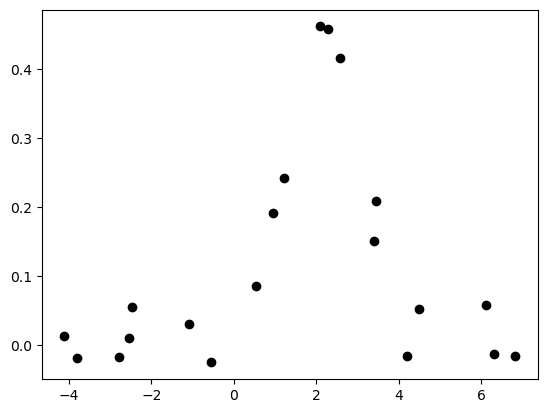

In [64]:
# First load in some data, "act_data.csv" - This is the data we will use for the activity
M = np.genfromtxt('act_data.csv', delimiter=',')
# Read in data from csv file

# Assign x and y values from the data.
x = M[0, :]
y = M[1, :]

# Plot the data using black circles. 
fig3, ax3 = plt.subplots()
ax3.plot(x, y, 'ko')

Is there a polynomial that fits here? Let's try. What if we want to try to represent this data by a parabola. That means a function of the form
$$\hat y = Ax^2+Bx+C.$$
I am going to call such a fit a "model". Anything that gives an output from an input can be considered a model. Here we have the input (that we know), the $x$ values, and we are trying to predict the $y$ values. 

As we saw above, the best-fit quadratic function (or quadratic model) will be the one with the best values of A, B, and C. We can find that fit using polyfit. Before we do that, I want to show how we can visualize the error for different models (different $A$, $B$, and $C$). This will help us think about different "best-fit" models using different error functions in the activity.

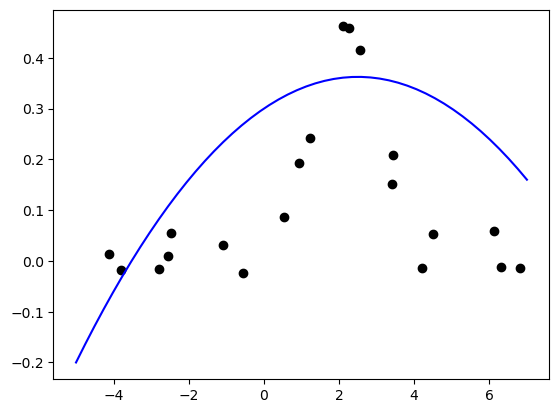

In [65]:
# Choose some A, B, and C. 
A = -.01
B = .05
C = .3

# Define the model as an anonymous function using those A, B, and C. Call it "y_model"
y_model = lambda X: A*X**2 + B*X + C

# Define a bunch of linearly spaced points between -5 and 7 using linspace.
xplot = np.linspace(-5, 7)

# Plot the model on ax3 using a blue line.
ax3.plot(xplot, y_model(xplot), 'b')
fig3

We can visualize the prediction by plotting the predicted values, $\hat y_k = \hat y(x_k)$, using blue open circles. Let's plot those below.

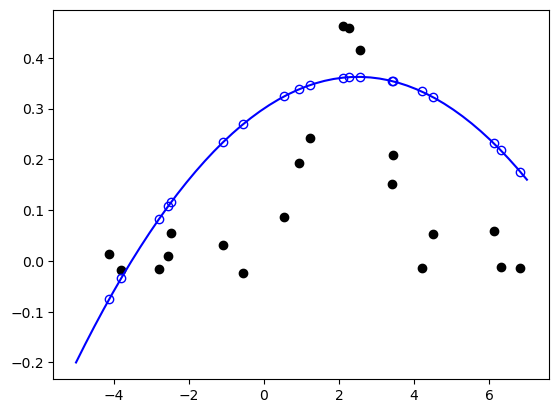

In [66]:
ax3.plot(x, y_model(x), 'bo', markerfacecolor='none') # Plot the predicted answers using open blue circles
fig3 # Show fig3

Now we can visualize the individual error for each of the predicted values by plotting the error bar. You don't need to understand exactly how the following code works, but it wouldn't hurt to do so!

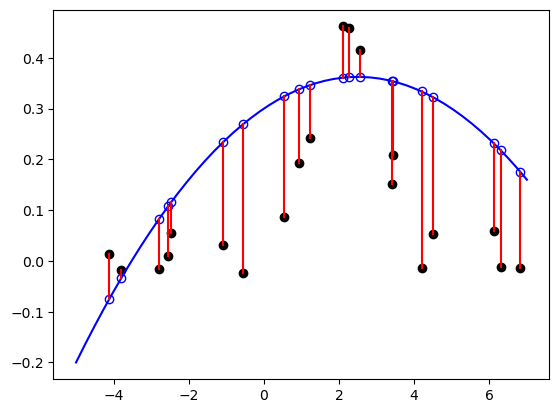

In [67]:
for index, xdata in enumerate(x):

    ydata = y[index]
    ax3.plot( np.array([xdata, xdata]), np.array([ydata, y_model(xdata)]), 'r')
    
fig3

Now we can visually see what happens to the error bars when we change $A$, $B$, and $C$. In particular, let's choose the optimal ones using polyfit.

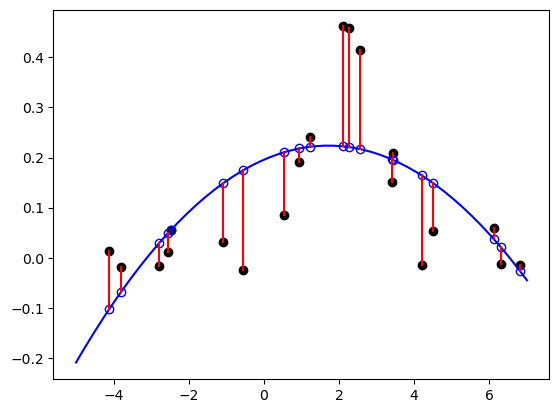

In [68]:
# Get the quadratic model for this data using polyfit
quad_model = np.polyfit(x, y, 2)

# Create a new figure and axes
fig4, ax4 = plt.subplots()

# Plot the data on this axis using black circles
ax4.plot(x, y, 'ko')

# Plot the model at the xplot points using a blue curve
ax4.plot(xplot, np.polyval(quad_model, xplot), 'b')

# Plot the predicted values using open blue circles
ax4.plot(x, np.polyval(quad_model, x), 'bo', markerfacecolor='none') # Plot the predicted answers using open blue circles


for index, xdata in enumerate(x): # Do the error-bar plotting
    ydata = y[index]
    ax4.plot( np.array([xdata, xdata]), np.array([ydata, np.polyval(quad_model, xdata)]), 'r')

We should be able to visually see that there is less error here. In the activity on Wednesday we will ask: is there a better model I can use here? For instance, this is the "best **quadratic** model. Is there a different functional form that fits better? We will also explore different error functions to see how different error functions change the outcome of the model.